# Выявление закономерностей, определяющих успешность компьютерных игр 

## Задача проекта:

Из открытых источников доступны исторические данные о продажах игр, оценки их пользователями и экспертами, жанры и платформы. Цель: выявить закономерности, определяющие успешность компьютерных игр. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й.

# Шаг 1. Изучаю общую информацию

In [141]:
# Импортирую необходимые библиотеки
import pandas as pd
import copy
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats as st
import numpy as np
#import missingno as msno
%matplotlib inline
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')
sns.set_style("whitegrid") # свойство sns устанавливать сетку для всех графиков
from IPython.display import display_html
from IPython.core.display import display, HTML
# импорт модуля display_html из библиотеки IPython
# импорт display, HTML из библиотеки IPython

In [142]:
# чтение файла с данными и сохранение в переменной df
# убрираю ограничение по выводу столбцов
#df = pd.read_csv('games.csv')
df = pd.read_csv('games.csv')

pd.set_option('display.max_columns', None)

In [143]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [144]:
#вывожу случайные 10 сток датафрейма
df.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
14251,Diabolik Lovers: More Blood,PSP,2013.0,Adventure,0.00,0.00,0.03,0.00,NaN,NaN,NaN
125,Red Dead Redemption,PS3,2010.0,Action,2.79,2.53,0.17,0.99,95.0,8.8,M
9662,Criticom,PS,1996.0,Fighting,0.07,0.05,0.00,0.01,NaN,NaN,NaN
3870,NFL 2K3,XB,2002.0,Sports,0.38,0.11,0.00,0.02,NaN,NaN,NaN
12737,Senritsu no Stratus,PSP,2011.0,Role-Playing,0.00,0.00,0.06,0.00,NaN,NaN,NaN
9706,Rocksmith,PC,NaN,Misc,0.06,0.04,0.00,0.01,78.0,8.1,T
1143,Dragon Quest IV: Chapters of the Chosen,DS,2007.0,Role-Playing,0.30,0.02,1.27,0.03,80.0,7.9,E10+
14054,Fighting Vipers 2,DC,2000.0,Fighting,0.00,0.00,0.04,0.00,NaN,NaN,NaN
2080,UFC Undisputed 3,X360,2012.0,Action,0.72,0.20,0.00,0.08,85.0,7.6,T
4325,Sphinx and the Cursed Mummy,PS2,2003.0,Action,0.22,0.17,0.00,0.06,NaN,NaN,NaN


In [145]:
# получение общей информации о данных в таблице
df.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


На этапе предобработи нужно будет заменить тип данных. 
- Столбец 'Year_of_Release' (годы выпуска) даны в float, нужно в integer.
- Стобец 'User_Score' (оценки пользователей) необходимо перевести из типа object в тип float.

In [146]:
#Посмотрим какие столбцы у нас имеются и все ли с ними в порядке
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

На этапе предобработки потребуется привести название столбцов в нижний регистр.

In [147]:
#Посчитаем количество пустых значений
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [148]:
# посмотрим на общее количество пропусков с помощью матрицы из библиотеки missingno
#msno.matrix(df)

In [149]:
# проверяем на наличие явных дубликатов
df.duplicated().sum()

0

### Вывод:
    
- Больше всего пропусков в столбцах `Critic_Score`, `User_Score`, `Rating` - можно будет подумать, чем их заполнить.
- Столбец `Year_of_Release` (годы выпуска) даны в float, нужно в integer. 
- Стобцы `User_Score` (оценки пользователей) в тип float. Данные столбца `Critic_score` (оценка критиков) необходимо перевести из типа object в integer.
- В значениях столбца `User_Score` встречается tbd - "to be defined" - это отсутсвие оценки на момент выгрузки дата фрейма. Это нормальное явление для компьютерных игр. Компьютерная игра должна пройте через определенное количество игроков или экспертов-геймеров, чтобы они дали оценку игре, а также может вообще не пройти оценку, так что по всему миру крупные агенства по рейтингу игр могут не оставить оценку. Из-за этого в большинстве случаев отсутсвуют оценки игроков или ESRB оценка. 
- Немного пропусков в `Year_of_Release` - 269 пропусков. 2 пропуска в столбцах `Name` и `Genre`.

# Шаг 2. Предобработка данных.

In [150]:
# Заменим названия столбцов (приведем к нижнему регистру) 
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [151]:
# заменим пропущенные значения в столбцах 'name' и 'genre' на unknown
df.fillna(
    {"name" : "unknown", 
     "genre" : "unknown"} 
    , inplace=True
)

In [152]:
# заменим значение "tbd" в столбце 'user_score' на NaN
df['user_score'] = df['user_score'].replace("tbd", np.NaN)

In [153]:
# Заменю данные в столбцах year_of_release и critic_score в тип integer. Года и оценки критиков - целые числа.
df['year_of_release'] = df['year_of_release'].astype('Int64')
df['critic_score'] = df['critic_score'].astype('Int64')

In [154]:
# Оценки пользователей приведем к типу float, т.к. на int не меняется из-за Nan
df['user_score'] = df['user_score'].astype('float64')

In [155]:
# Проверяю измененные типы данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16715 non-null object
platform           16715 non-null object
year_of_release    16446 non-null Int64
genre              16715 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null Int64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.4+ MB


Пропущенные данные в столбцах 'critic_score' и 'user_score' нельзя заполнить средним или медианным закономерностям по году или жанру. Каждая игра получает индивидуальную и оценку критиков и пользователей.

In [156]:
# выведем уникальные значения колонки rating
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

По данным `Playground` рейтинг K-A:
Для детей – для тех, кто уже научился говорить и держать джойстик, эти игры уже могут вызывать интерес (позже в 1998 году был переименован в Е – для всех возрастов, а также чуть позже был добавлен рейтинг Е10+, как промежуточный между Е и Т)


По данным `Wikipedia` рейтинг K-A:
Игры с таким рейтингом, как видно из названия, нравятся и детям, и взрослым. Этот рейтинг использовался с 1994 по 1998 год, прежде чем он был заменен рейтингом для всех (E)


**Вывод:** *Считаем, что значение категорий E и K-A идентичны.*. 

In [157]:
# заменим рейтинг K-A на E:
df['rating'] = df['rating'].replace('K-A', 'E')

Колонка rating имеем тип object, поэтому пропуски в ней заменим на `no_rating`.

In [158]:
df['rating'] = df['rating'].fillna('no_rating')

- Попробую восстановить данные в столбце 'year_of_release'. В названиях игр иногда присутствует год. Попробую заполнить с помощью регулярных выражений.

In [159]:
# Создам столбец 'year' и с помощью регулярных выражений вычленю из столбца 'name' возможные годы выхода игр
df['year'] = df['name'].str.extract(r'(\d{2,4})')

In [160]:
# Заменим Nan на 0
df['year_of_release'] = df['year_of_release'].fillna(0)
df['year'] = df['year'].fillna('0')

In [161]:
# заменю тип данных на int
df['year_of_release'] = df['year_of_release'].astype(int) 
df['year'] = df['year'].astype('int64')
df.loc[df['year_of_release'] == 0, 'year_of_release'] = df['year']

In [162]:
def change_year(row):
    """
    Функция ищет в значениях столбца 'year_of_release' годы, которые записались 
    2-х значным числом, по последним цифрам года и перезаписывает их в 4-х значные,
    а те, что не соответвуют выбранному диапозну годов - обнуляет, не трогая верные значения.
    """
    if 0 < row <= 11:
        row += 2000
        return int(row)
    elif 98 < row <= 99:
        row += 1900
        return int(row)
    elif 19 < row <= 64:
        row = 0
        return int(row)
    else:
        pass
        return int(row)
    
df['year_of_release'] = df['year_of_release'].apply(change_year) # применим функцию к столбцу 'year_of_release'

In [163]:
df['year_of_release'].value_counts()

2008    1429
2009    1427
2010    1255
2007    1200
2011    1138
2006    1009
2005     941
2002     830
2003     779
2004     764
2012     653
2015     606
2014     581
2013     545
2016     502
2001     482
1998     379
2000     350
1999     340
1997     289
1996     263
0        245
1995     219
1994     121
1993      62
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
500        1
Name: year_of_release, dtype: int64

Удалось заполнить (269-245) = 24 значения в столбце 'year_of_release'.

In [164]:
df = df[df['year_of_release']>500]

In [165]:
df['year_of_release'].value_counts()

2008    1429
2009    1427
2010    1255
2007    1200
2011    1138
2006    1009
2005     941
2002     830
2003     779
2004     764
2012     653
2015     606
2014     581
2013     545
2016     502
2001     482
1998     379
2000     350
1999     340
1997     289
1996     263
1995     219
1994     121
1993      62
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1987      16
1990      16
1988      15
1984      14
1985      14
1980       9
Name: year_of_release, dtype: int64

In [166]:
# Добавление столбца 'all_sales', где буду хронить данные о суммарных продажах во всех регионах
df['all_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [167]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,0,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_rating,0,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,0,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,0,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_rating,0,31.38


### Вывод: 
- Привела название столбцов к нижнему регистру.
- Заменила тип данных в столбцах: формат столбца user_score на float, 'year_of_release' и 'year' на integer.
- Заменала пропущенные значения там, где это можно было сделать.
- Пропущенные данные в столбцах 'critic_score' и 'user_score' нельзя заполнить средним или медианным закономерностям по году или жанру. Т.е. каждая игра получает индивидуальную и оценку критиков и пользователей.
- В колонке rating осуществлена замена устаревшего понятия К-А («Для детей и взрослых») на значение E («Для всех») соответсвии с текущей градацией и пропуски в колонке заменила на 'no_rating'.
- Удалось заполнить 24 значения в столбце 'year_of_release' с помощью регулярных выражений.
- В столбец 'all_sales', добавила данные о суммарных продажах во всех регионах.

# Шаг 3. Исследовательский анализ данных.

**1. Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?**

In [168]:
# группирую данные по играм и по году релиза
years_groups = df.pivot_table(index='year_of_release', values='name', aggfunc='count') # исключаем все 0 и одно значение 500 (года выпуска), в те года игры были другие хе-хе
years_groups

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


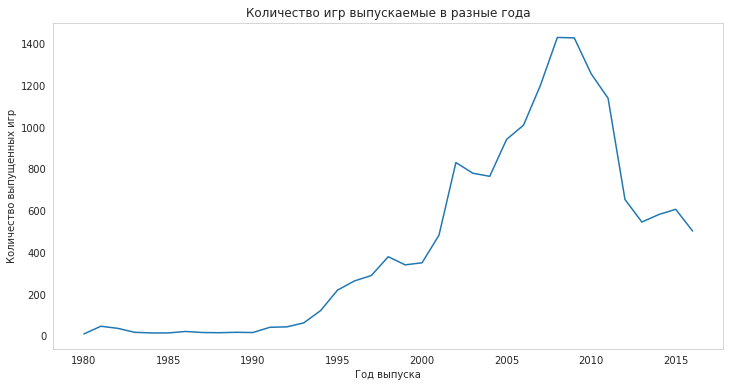

In [169]:
# Строю график
plt.figure(figsize=(12,6))
plt.plot(years_groups)
plt.title('Количество игр выпускаемые в разные года')
plt.xlabel("Год выпуска")
plt.ylabel("Количество выпущенных игр")
plt.grid()
plt.show()

- По графику видно, что данные за все периоды не важны.

- С 1980 годов по 1993 мало выпущенных игр и спроса. Рост выпуска игр начался с 1994-1995г. Когда появились первые компьютеры для домашнего пользования.

- К 2002 году видно, что выпустилось много игр. Так как компьютеры начали появляться почти в каждой семье и активно использовался интернет.

- Максимум в 2009 это не только огромный спрос на компьютерне игры, но и распространенность компьютерных движков (разработка игр удешевилась, они быстрее начали выходить в релиз, поэтому их стало больше), кроме того широкополосной интернет достиг максимума своего распространения. Игры стали более реалистичны, с хорошей графикой и интереснее для пользователей. 

- Резкий упадок продаж 2012 по 2016 обусловлен требованиями к лицензированию игр, игры стали дороже, не все могли их себе позволить.

**2. Посмотрим, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?**

In [170]:
platform_group = df.pivot_table(index='platform', values='all_sales', aggfunc='sum').reset_index().sort_values(by='all_sales', ascending=False)
platform_group

,platform,all_sales
16,PS2,1247.28
28,X360,961.88
17,PS3,931.34
26,Wii,892.37
4,DS,802.79
15,PS,729.04
18,PS4,314.14
6,GBA,312.88
19,PSP,291.18
2,3DS,257.81


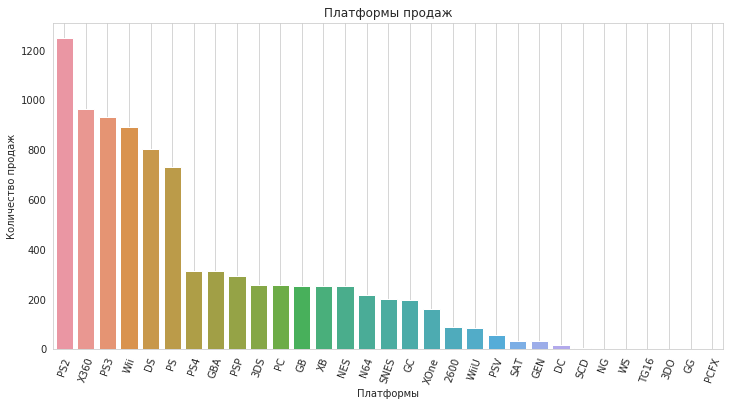

Платформы с наибольшими суммарными продажами за весь период:
   platform  all_sales
16      PS2    1247.28
28     X360     961.88
17      PS3     931.34
26      Wii     892.37
4        DS     802.79


In [171]:
# Строю гистограмму распределения по годам
plt.figure(figsize=(12,6))
sns.barplot(platform_group['platform'], platform_group['all_sales'])
plt.title('Платформы продаж')
plt.xlabel("Платформы")
plt.ylabel("Количество продаж")
plt.xticks(rotation=70)
plt.grid()
plt.show()
print('Платформы с наибольшими суммарными продажами за весь период:')
print(platform_group.sort_values(by='all_sales', ascending=False).head(5))

In [172]:
top_5 = ['PS2', 'X360', 'PS3', 'Wii', 'DS']

In [173]:
# Создадим сводную таблицу по платформам и их суммарным продажам
# отсортируем по убыванию и оставим только топ 5
top_5_platform = df.loc[df['platform'].isin(top_5)].pivot_table(index=['platform', 'year_of_release'], values='all_sales', aggfunc='sum').sort_values(by='all_sales', ascending=False)
top_5_platform = top_5_platform.reset_index()
top_5_platform.head(10)

,platform,year_of_release,all_sales
0,PS2,2004,220.55
1,Wii,2009,206.97
2,PS2,2002,205.38
3,PS2,2003,185.93
4,Wii,2008,171.32
5,X360,2010,170.03
6,PS2,2001,166.43
7,PS2,2005,160.98
8,PS3,2011,156.78
9,Wii,2007,153.24


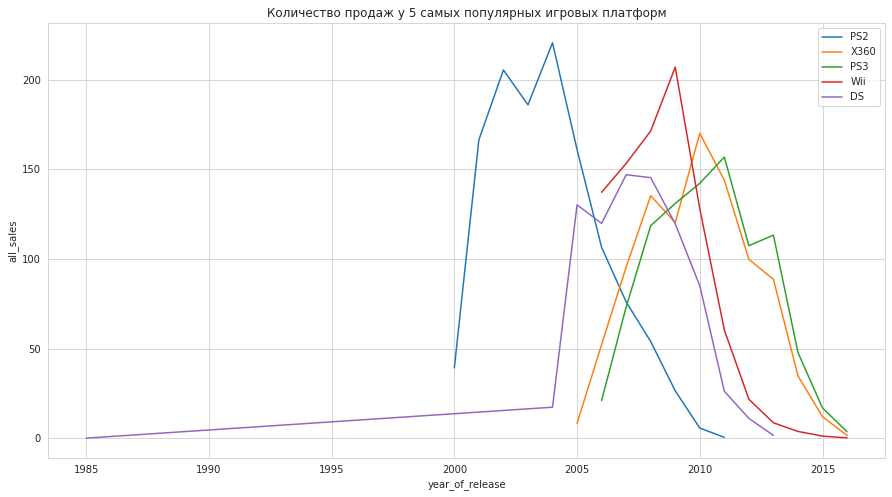

In [174]:
#Возьмем топ 5 платформ и посмотрим их распределение по годам
plt.figure(figsize=(15,8))
plt.title('Количество продаж у 5 самых популярных игровых платформ')
plt.xlabel('Годы выхода игр')
plt.ylabel('Продажи')


for platform in top_5:
    rez = top_5_platform.loc[top_5_platform['platform'] == platform]
    rez = rez.set_index('platform')
    sns.lineplot(x=rez['year_of_release'], y=rez['all_sales'], label=platform)    
    plt.legend()

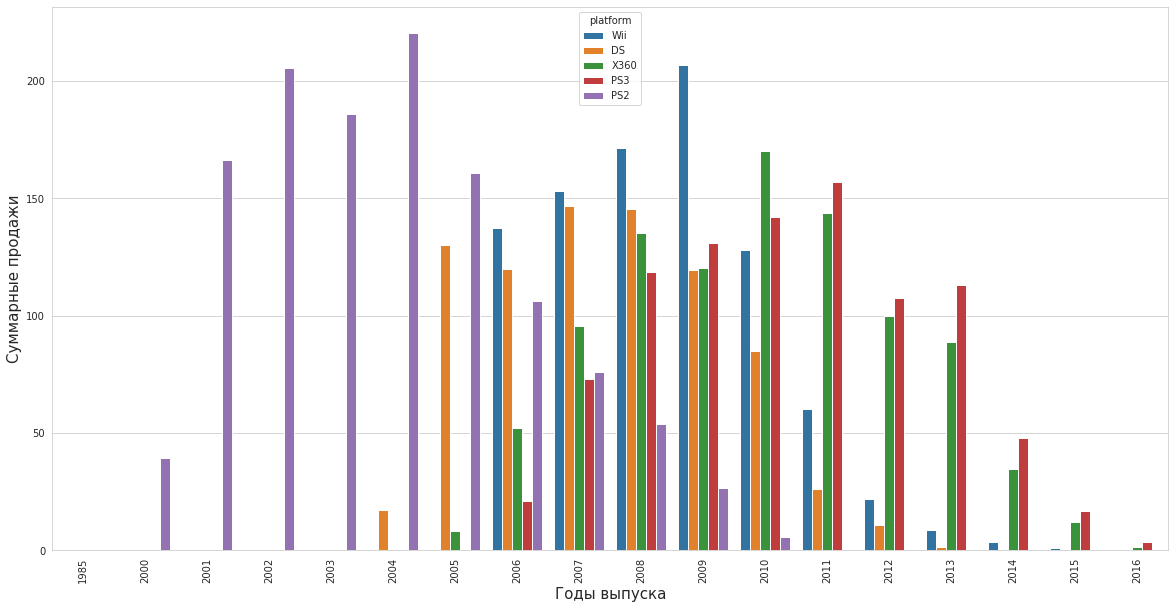

In [175]:
# Смотрю, сколько "живет" каждая платформа из топ-5 платформ
plt.figure(figsize=(20, 10))

sns.barplot(x='year_of_release', y='all_sales', hue='platform', estimator = np.sum,
           data=df.query('platform == @top_5 and year_of_release != 0'), ci=0) # не беру в расчет 0
plt.xlabel('характерный срок жизни каждой из топовых платформ', fontsize=20)
plt.xlabel('Годы выпуска', fontsize=15)
plt.ylabel('Суммарные продажи', fontsize=15)
plt.xticks(rotation=90)
plt.show()

**Вывод:**

- Практически все игровые платформы в среднем "живут" около 8-10 лет. О том, за какой срок появляются новые платформы - по гистограмме можно сказать, что в среднем за 1-2 года.
- Все наши лидеры изживают себя к 2016 году. Видимо, взамен им приходят новые более прикольные платформы.
- Cамые продаваемые это платформы Wii и X360. DS очень старая платформа, аж с 1985 года.
- Самый пик популярности наступает примерно через 3-5 лет после выхода платформы.

**3. Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывайте в работе данные за предыдущие годы. Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.**

In [176]:
#берем актуальный период от 2014 года:
df = df.loc[df['year_of_release'] >= 2014]
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year,all_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_rating,0,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,0,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,no_rating,0,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,16,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,no_rating,2015,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0,0.01


 Выясним, какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.

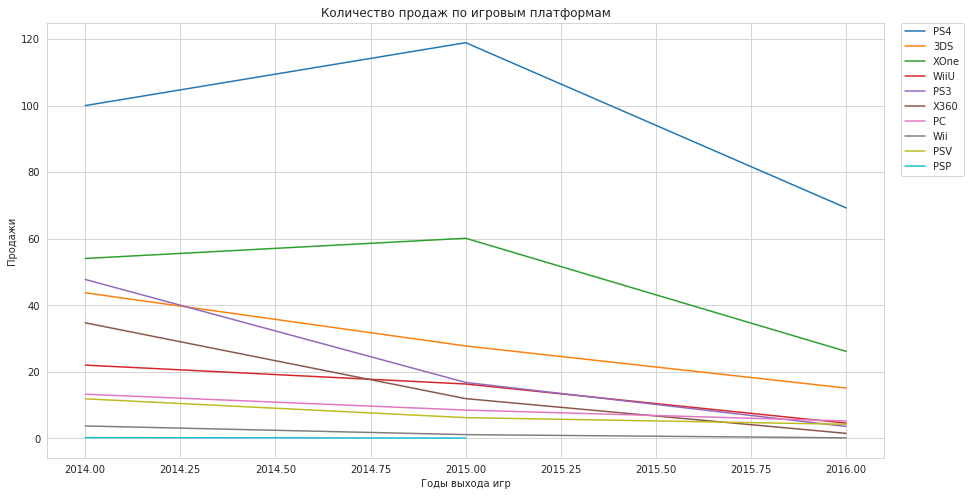

In [177]:
#Возьмем актуальный период и посмотрим распределение по годам
plt.figure(figsize=(15,8))
plt.title('Количество продаж по игровым платформам')


for platform in df['platform'].unique():
    rez = df.loc[df['platform'] == platform]
    rez = rez.set_index('platform')
    sns.lineplot(x=rez.groupby("year_of_release")['all_sales'].sum().index, 
                 y=rez.groupby("year_of_release")['all_sales'].sum(), label=platform)  
    plt.xlabel('Годы выхода игр')
    plt.ylabel('Продажи')
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

*Вывод:*

В целом видно, что продажи по всем платформам падают. Потенциально прибыльными платформами судя по графику, можно считать: PS4, XOne, 3DS. PC и Wii хоть и не столь популярны, как вышеописанные платформы, но по графику видно, как равнамерны линии, хоть и результаты не высоки, можно сказать, что PC и Wii стабильные платформа и их нельзя сбрасывать со счетов.
По всем остальным платформам продажи приблизительно одинаковые.

**4. Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.** 

In [178]:
#Сохраню в переменной top_5_platform топ 5 платформ и избавлюсь от выбросов (< 1.4)
top_5_platform = df[df['platform'].isin(['PS4', 'XOne', '3DS', 'PC', 'Wii'])]
top_5_platform = top_5_platform[top_5_platform['all_sales'] < 1.4]

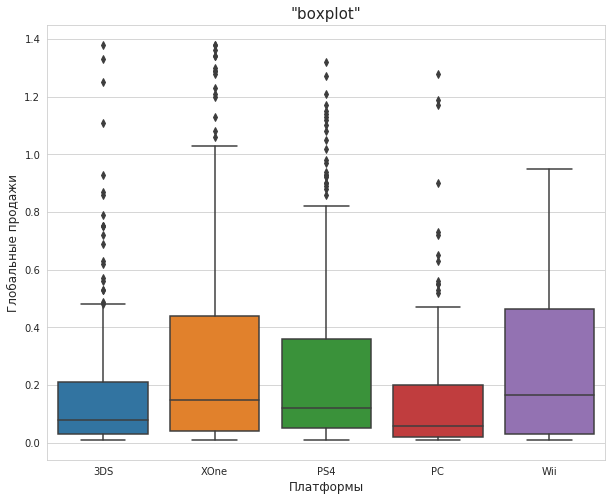

In [179]:
#Отрисуем "ящик с усами" для каждой платформы 
plt.figure(figsize=(10,8))
sns.boxplot(data=top_5_platform, x='platform', y='all_sales')
plt.title('"boxplot"', fontsize=15)
plt.xlabel('Платформы', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)
plt.show()

**Вывод:**
- Видно, что медиана по глобальным продажам протекает у всех топ-платформ по разному.
- Больше всех глобальных продаж у Wii, затем XOne, PS4, последние - 3DS и PC. 

**5. Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.  Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.**

In [180]:
# Беру популярную платформу из топ-5 - XOne:
xone = df[df['platform']=='XOne']

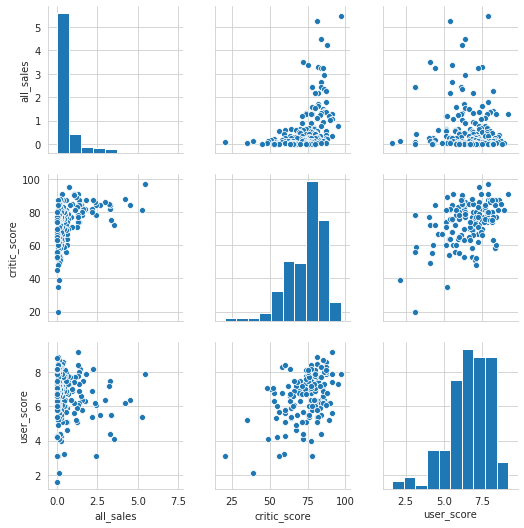

In [181]:
# Диаграмма рассеяния для XOne:
sns.pairplot(xone[['all_sales', 'critic_score', 'user_score']])
plt.show()

Вывод: 
- Игры с высокой оценкой критиков продаются лучше.
- Видно, что есть игры с высокой оценкой пользователей, но они плохо продаются. Т.е. оценка пользователей слабо влияет на продажи. Покупатели больше прислушиваются к критикам.

In [182]:
# Построю еще матрицу корреляции:
corr  = xone[['all_sales', 'critic_score', 'user_score']].corr()
corr.style.background_gradient('coolwarm')

,all_sales,critic_score,user_score
all_sales,1,0.428677,-0.0703839
critic_score,0.428677,1,0.440977
user_score,-0.0703839,0.440977,1


Вывод:
- Корреляция между all_sales и critic_score равна 0.43, что подтверждает то, мы увидели эту зависимость на графике.
- Корреляции между all_sales и user_score вообще нет линейной зависимости (-0.07).

Соотнесу выводы с продажами игр на других платформах:

In [183]:
# Использую матрицу корреляции для 2 других менее популярных платформ:
corr  =  df[df['platform']=='PS4'][['all_sales', 'critic_score', 'user_score']].corr()
corr.style.background_gradient('coolwarm')

,all_sales,critic_score,user_score
all_sales,1,0.402661,-0.0401316
critic_score,0.402661,1,0.546434
user_score,-0.0401316,0.546434,1


In [184]:
corr  =  df[df['platform']=='PC'][['all_sales', 'critic_score', 'user_score']].corr()
corr.style.background_gradient('coolwarm')

,all_sales,critic_score,user_score
all_sales,1,0.174634,-0.0715967
critic_score,0.174634,1,0.466099
user_score,-0.0715967,0.466099,1


**Вывод:**

У PS4, PC тоже наблюдается не сильная связь между оценками критиков и продажами, но она сильнее, чем связь между оценками пользователей и продажами - можно сказать, что ее вообще нет, т.к. значения отрицательные.

**7. Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**

In [185]:
# Сделаю сводную таблицу по genre_group, где выведу жанры и их продажи, отсортирую по убыванию
genre_group = df.pivot_table(index='genre', values='all_sales', aggfunc='median').sort_values(by='all_sales', ascending=False)
genre_group
#genre_group = genre_group.reset_index().rename_axis(None, axis=1)
#genre_group.style.bar(color='lightgreen')

,all_sales
genre,
Shooter,0.515
Sports,0.180
Platform,0.140
Fighting,0.125
Role-Playing,0.110
Simulation,0.100
Action,0.090
Misc,0.090
Racing,0.090


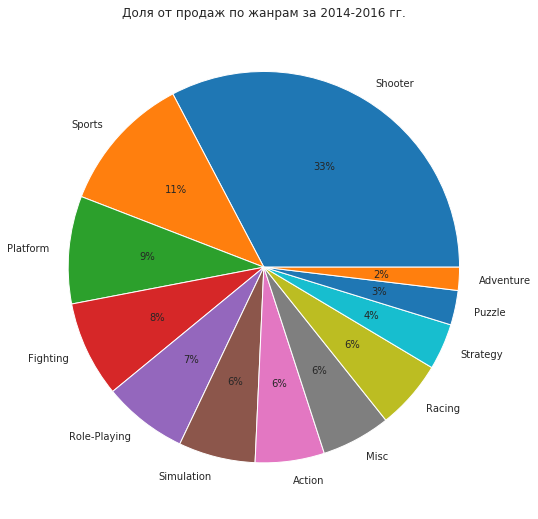

In [186]:
#посмотрим на среднюю выручку по каждому из жанров за выбранный период:
genre_group['all_sales'].plot(kind='pie', figsize=(9, 9), autopct='%.0f%%', 
                                                title='Доля от продаж по жанрам за 2014-2016 гг.')
ax = plt.gca()
ax.set_ylabel('')
plt.show()

**Вывод:**

Проанализировав данные, по медиане глобальных продаж по каждому жанру, можно выделить топ-3 жанра игр, пользующихся наибольшей популярностью: Shooter(топ-1), Sports и Platform. Продажи жанра Shooter разительно превуалируют на фоне остальных.
И наоборот, среди жанров есть явные аутсайдеры - Strategy, Puzzle и Adventure, их средние продажи в 10 раз ниже, чем у Shooter. Мало кто будет джойстиком пытаться направлять армии в стратегии(этот жанр был популярен лишь на заре создания игр и его популярность стала угасать в начале 2000-х), а в пазл и вовсе играют, в основном, офисные сотрудники, во время перерыва на обед.
Вывод: У большинства игроков в приоритете динамические игры, тем более, грамотно разработанное управление и особенно красивая картинка, всегда привлекали большее число геймеров. При планировании рекламной кампании на 2017 год, необходимо акцентировать внимание на жанре Shooter.

### Вывод по 3 шагу (исследовательскому анализу данных):

- С 1980 годов по 1993 мало выпущенных игр и спроса. Рост выпуска игр начался с 1994-1995г. Когда появились первые компьютеры для домашнего пользования.К 2002 году выпустилось много игр. Максимума продажи достигли в 2009 это не только огромный спрос на компьютерне игры, но и распространенность компьютерных движков (разработка игр удешевилась, они быстрее начали выходить в релиз, поэтому их стало больше), кроме того широкополосной интернет достиг максимума своего распространения. Резкий упадок продаж 2012 по 2016 обусловлен требованиями к лицензированию игр, игры стали дороже, не все могли их себе позволить.

- Средняя жизнь игровой платформы составляет 8-10 лет. Пик продаж наступает примерно через 4-5 лет после выхода платформы.

-  А значит актуальный период для отбора перспективных платформ с 2014г по 2016г. Учитывая актуальный для анализа период, можно заключить, что набирают популярность такие платформы как: PS4 и XOne, а так же, но в меньшей степени, такие свежие платформы, как 3DS, PSV и WiiU. К сожалению, популярность X360 стремительно падает.

- У анализируемых нами платформ наблюдается взаимосвязь между продажами и оценками критиков. Пользовательские же оценки почти не играют значимой роли. Это значит, что для людей мнение критиков более важное и решающее, чем мнения других пользователей.

- При планировании рекламной кампании на 2017 год, необходимо акцентировать внимание на игры жанра Shooter и полностью проигнорировать такие игровые жанры как - Puzzle, Strategy и Adventure.

## Шаг 4. Составьте портрет пользователя каждого региона (NA, EU, JP):


1. Самые популярные платформы (топ-5). Опишите различия в долях продаж.

2. Самые популярные жанры (топ-5). Поясните разницу.

3. Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### 4.1. Найду самые популярные платформы по регионам и их доли продаж.

Учитывая характерный срок жизни платформы (в среднем 10 лет), необходимо вывести не только топ-5 платформ за актуальный период(ведь за этот срок топ платформа могла бы уже и подойти к завершению своей популярности), но и сравнить эти данные за последний год продаж (так как за 2016 год информация не полная, включим в выборку данные за 2015-2016 годы):

In [187]:
def top_platforms_reg(row_top, row_sales):
        
    """Функция принимает в аргумент колонки платформ и продаж по региону,
    строит сводную таблицу и выводит топ-5 по продажам по регионам за период с 2014 по 2016г.
    """
    sales_reg_top = (df.pivot_table(index=row_top, values=row_sales, aggfunc='sum')
               .sort_values(by=row_sales, ascending=False))   

    return sales_reg_top.head()

Для удобства сравнения выведем сводные таблицы, ранжируя по регионам. Будем выводить топ-5 по продажам по региону за период с 2014 по 2016гг.

In [188]:
def display_side_by_side(*args):
    """Функция позволяет выводить несколько таблиц в ряд
    """
    html_str=' '
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [189]:
# выведем результат по Северной Америке, Европе и Японии с помощью функции display_side_by_side
display_side_by_side(top_platforms_reg('platform','na_sales'),top_platforms_reg('platform','eu_sales'),
                     top_platforms_reg('platform','jp_sales'),top_platforms_reg('platform','other_sales'))

,na_sales
platform,
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05
,eu_sales
platform,
PS4,130.04
XOne,46.25


In [190]:
def top_pie(df, row_top, row_sales, ax):
    """Функция принимает в аргументы датафрейм, колонку по которой хотим вывести топ-5,
    колонку продаж по региону, а так же позиционный аргумент
    и строит круговую диаграмму продаж по региону за 2014-2016г
    """
    title_dict = {'na_sales': 'Продажи в Северной Америке', 'eu_sales': 'Продажи в Европе', 'jp_sales': 'Продажи в Японии'}
    pie_top = (df.pivot_table(index=row_top, values=row_sales, aggfunc='sum')
                       .sort_values(by=row_sales, ascending=False))[:5]
    

    pie_top[row_sales].plot(kind='pie',ax=axes[ax], autopct='%.0f%%', 
                                                title=title_dict[row_sales], rot=30)
    
    ax = plt.gca()
    ax.set_ylabel('')  

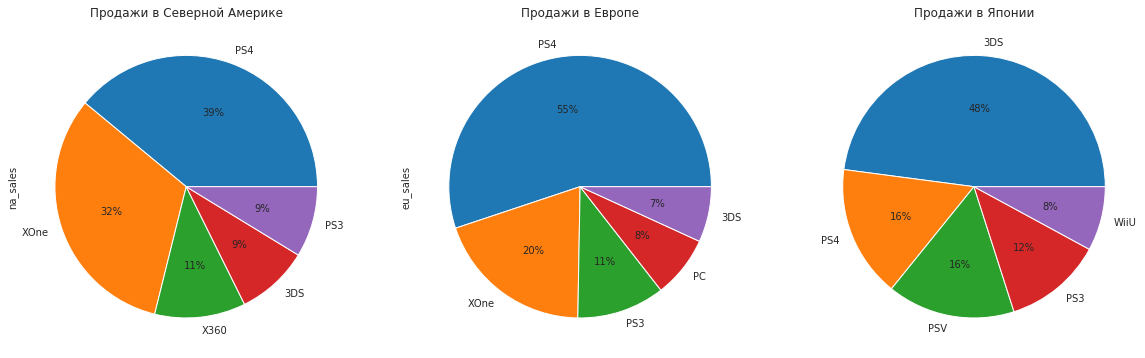

In [191]:
# выводим круговые диаграммы продаж по регионам за 2014-2016г:
fig, axes = plt.subplots(1, 3, figsize=(20,20))

top_pie(df,'platform','na_sales',0)
top_pie(df,'platform','eu_sales',1)
top_pie(df,'platform','jp_sales',2)

**Вывод**
В Североамериканском регионе, Европпе и в остальных регионах, при планировании рекламной кампании, необходимо обратить внимание на платформы PS4 и XOne. А вот в Японии, геймерам больше по вкусу 3DS и лишь за тем PS4. Все же самой перспективной платформой на 2017г следует считать PS4.

### 4.2. Найду самые популярные жанры по регионам 

Для удобства сравнения выведем сводные таблицы, ранжируя по регионам. Будем выводить топ-5 по продажам по региону за период с 2014 по 2016г.

In [192]:
display_side_by_side(top_platforms_reg('genre','na_sales'),top_platforms_reg('genre','eu_sales'),
                     top_platforms_reg('genre','jp_sales'),top_platforms_reg('genre','other_sales'))
# выводим результат по Северной Америке, Европе и Японии с помощью функции display_side_by_side

,na_sales
genre,
Shooter,79.02
Action,72.53
Sports,46.13
Role-Playing,33.47
Misc,15.05
,eu_sales
genre,
Action,74.68
Shooter,65.52


    Судя по таблицам, топ-5 жанров по продажам за период с 2014 по 2016г в Североамериканском, Европейском и остальных регионах практически не меняется(в Европе и других странах более популярен жанр Action нежели Shooter). В Японии же дела обстоят иначе. За последние три года на первых двух местах по продажам держатся Role-Playing(Топ-1) и Action, причем лидерство это надежное, с большим отрывом от остальных жанров. А так же в топ-5 по продажам ворвался жанр Shooter, что так же говорит о его растущей популярности в данном регионе.

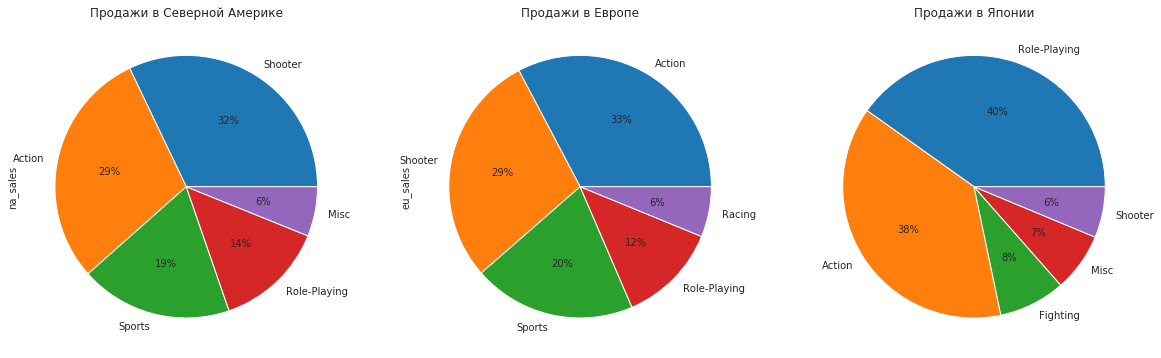

In [193]:
# выводим круговые диаграммы продаж по регионам за 2006-2016г
fig, axes = plt.subplots(1, 3, figsize=(20,20))

top_pie(df,'genre','na_sales',0)
top_pie(df,'genre','eu_sales',1)
top_pie(df,'genre','jp_sales',2)

**Вывод:**

По данным диаграммам очевидно, что жанры `Action` и `Shooter` превалируют над остальными в Североамериканском Европейском регионах. Жанр `Shooter` становится наиболее популярным в последние годы.
В Японии наиболее популярным является `Role-Playing`, но и `Action` от него практически не отстает (38% продаж), а `Shooter` ворвался в первую пятерку, возможно в ближайшее время его популярность в Японии будет так же расти, как и в остальных регионах.

### 4.3. Определю, влияет ли рейтинг ESRB на продажи в отдельном регионе? 

*Описание рейтингов ESRB:*

- «EC» («Early childhood») — «Для детей младшего возраста».

- «E» («Everyone») — «Для всех».  

- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше».

- «T» («Teen») — «Подросткам».  

- «M» («Mature») — «Для взрослых».  

- «RP» («Rating Pending») — «Рейтинг ожидается».

In [194]:
def top_esrb_reg(row_top,row_sales):
        
    """Функция принимает в аргумент колонки платформ и продаж по региону,
    строит сводную таблицу и выводит топ-5 по продпжпм по регионы за период с 2014 по 2016г.
    """
    esrb_reg_top = (df.pivot_table(index=row_top, values=row_sales, aggfunc='sum')
               .sort_values(by=row_sales, ascending=False))   

    return esrb_reg_top.head()

In [195]:
# выводим топ рейтингов esrb по продажам по Северной Америке, Европе и Японии с помощью функции display_side_by_side:
display_side_by_side(top_esrb_reg('rating','na_sales'),top_esrb_reg('rating','eu_sales'),
                     top_esrb_reg('rating','jp_sales'),top_esrb_reg('rating','other_sales'))

,na_sales
rating,
M,96.42
no_rating,64.72
E,50.74
T,38.95
E10+,33.23
,eu_sales
rating,
M,93.44
no_rating,58.95


In [196]:
def esrb_top_pie(df, row_top, row_sales, ax):
    """Функция принимает в аргументы датафрейм, колонку по которой хотим вывести топ продаж,
    колонку продаж по региону, а так же позиционный аргумент
    и строит круговую диаграмму продаж по региону за 2014-2016г
    """
    title_dict = {'na_sales': 'Продажи в Северной Америке', 'eu_sales': 'Продажи в Европе', 'jp_sales': 'Продажи в Японии'}
    pie_top = (df.pivot_table(index=row_top, values=row_sales, aggfunc='sum')
                       .sort_values(by=row_sales, ascending=False))[:5]
    

    pie_top[row_sales].plot(kind='pie',ax=axes[ax], autopct='%.0f%%', 
                                                title=title_dict[row_sales], rot=30)
    
    ax = plt.gca()
    ax.set_ylabel('')  

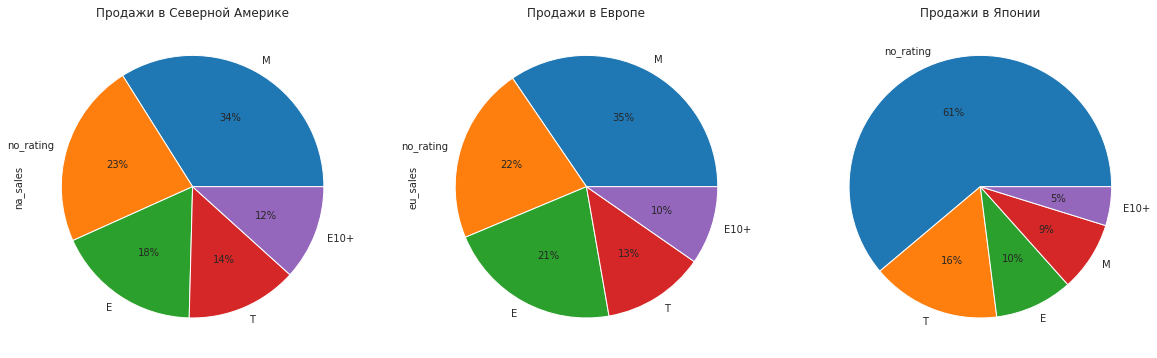

In [197]:
# выводим круговые диаграммы продаж по регионам за 2014-2016г
fig, axes = plt.subplots(1, 3, figsize=(20,20))

esrb_top_pie(df,'rating','na_sales',0)
esrb_top_pie(df,'rating','eu_sales',1)
esrb_top_pie(df,'rating','jp_sales',2)

**Вывод:** 
 
 Рейтинг ESRB **влияет** ли на продажи в Северной Америке и Европе:

- За последние три года топ-1, по количеству продаж в Северной Америке и Европе, занимали игры с рейтингом `ESRB` - `M`(«Для взрослых 17+»), это скорее всего связано, с тем, что основными представителями геймеров по всему миру являются в основном молодые люди 25+ (по данным Entertainment Software Association, средний возраст геймеров составляет 31 год), а игры с рейтингом `Е` не соответствуют их потребностям в полной мере.


  В Японии же, рейтинг ESRB похоже **не имеет влияния**, так как самые продаваемые игры там не имеют рейтинга(`no_rating` - имеют львиную долю от рынка 61%).


<div class="alert alert-block alert-info">
<b> Примечание:
</b> В Японии если издатель желает выпустить игру в Японии, то там он будет иметь дело с системой оценок от Computer Entertainment Rating Organization (CERO), которая занимается данным вопросом с 2002 года. `CERO` делает упор на *подростковом возрасте* – после рейтинга «для всех» тут не используется обыденный в остальных системах «для детей». Кстати, они же чуть ли не единственные, кто требует размещения полноценной возрастной «метки» даже на «корешках» коробок.

### Вывод по 4 шагу:


**Портрет геймера из Северной Америки:** 


- В Североамериканском регионе при планировании рекламной кампании, необходимо обратить внимание на платформы `PS4` и `XOne`(доли продаж 39% и 32% соответственно).

- Самые популярные игровые жанры в данном регионе, за актуальный период: `Action` и `Shooter`(доля от продаж по региону: 29%, 32% соответственно).

- Топ-1 по продажам в данном регионе игры с рейтингом `ESRB` - `M`(доля продаж 34%).


**Портрет геймера из Европы:**  

- В Европейском регионе при планировании рекламной кампании, необходимо обратить внимание на платформу `PS4`(лидер рынка 55% продаж), `XOne` заметно отстает (20%).

- Самые популярные игровые жанры в данном регионе, за актуальный период так же: `Action` и `Shooter`( только `Action` в данном регионе обошел конкурента с долями продаж 33% и 29% соответственно).

- Топ-1 по продажам в данном регионе  так же игры с рейтингом `ESRB` - `М`(доля продаж 35%). 


**Портрет геймера из Японии:**  

- За прошедшие три года у геймеров Японии в топе по продажам оказались игры на платформе `3DS` ( топ-1 с долей продаж 48%), а за тем лишь платформы `PS4` и `PSV`(16% продаж у каждой).

- Самые популярные игровые жанры в данном регионе, за актуальный период: `Role-Playing`(Топ-1 40% продаж) и `Action`(38% продаж). 

- Топ-1 по продажам в данном регионе игры не имеющие рейтинга `ESRB`(61% продаж), отсюда можно предположить, что данный рейтинг не оказывает влияния на продажи в регионе, возможно это связано с тем, что в данном регионе на рынке представлен оппонент - японская организация `CERO`, которая так же занимается присуждением возрастных рейтингов в регионе с 2002года.

## Шаг 5. Проверьте гипотезы

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Задайте самостоятельно пороговое значение alpha.

#### Гипотерза 1

- Нулевая гипотеза H₀: *Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.*

- 
Альтернативная гипотеза H₁: *Средние пользовательские рейтинги платформ Xbox One и PC отличаются.*

Пороговое значение α = 5% ( .05)

In [198]:
# Сохраним в переменных xbox и pc соответствующие данные
xone = df[(df['platform']=='XOne')]['user_score']
pc = df[(df['platform']=='PC')]['user_score']

In [199]:
# код ревьера
test_xone = df[df['platform']=='XOne']['user_score']

print(len(test_xone))
print(len(xone))

228
228


In [200]:
# Посчитаем средний рейтинг пользователя для xbox платформ
xone.mean()

6.594545454545454

In [201]:
# Посчитаем средний рейтинг пользователя для PC платформ
pc.mean()

6.298360655737704

In [202]:
# Выполним проверку гипотезы. Будем использовать метод ttest_ind

alpha = .05

results = st.ttest_ind(xone.dropna(), pc.dropna(), equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.11601398086668827
Не получилось отвергнуть нулевую гипотезу


**Вывод:**

Cтатистический тест дал возможность опровергнуть нулевую гипотезу, и предполагать, что cредние пользовательские рейтинги платформ Xbox One и PC отличаются.

#### Гипотеза 2

- Нулевая гипотеза H₀: *Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.*

- Альтернативная гипотеза H₁: *Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.*

Пороговое значение α = 5% ( .05)

In [203]:
# Сохраню в переменных genre_action и genre_sports соответствующие данные с пользовательскими оценками
genre_action = df[(df['genre']=='Action') & (df['year_of_release'])]['user_score']
genre_sports = df[(df['genre']=='Sports') & (df['year_of_release'])]['user_score']

In [204]:
# выведем среднюю оценку по жанру экшн
genre_action.mean()

6.941666666666666

In [205]:
# выведем среднюю оценку по жанру спорт
genre_sports.mean()

5.006666666666667

In [206]:
#Выполним проверку гипотезы. Будем использовать метод ttest_ind

alpha = .05

results = st.ttest_ind(genre_action.dropna(), genre_sports.dropna(), equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.1605525409314364e-08
Отвергаем нулевую гипотезу


**Вывод:**

Cтатистический тест дал возможность опровергнуть нулевую гипотезу, и предполагать, что cредние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

### Вывод по проверке гипотез:

Проверила гипотезы по функции ttest_ind, вычисляющей t-тест двух независимых выборок:

- Гипотеза 1: Cтатистический тест дал возможность опровергнуть нулевую гипотезу, и предполагать, что cредние пользовательские рейтинги платформ Xbox One и PC отличаются.

- Гипотеза 2 : Cтатистический тест дал возможность опровергнуть нулевую гипотезу, и предполагать, что cредние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

## Шаг 6. Общий вывод.

- Перед анализом данных я подготовили наши данные, привела к правильным данным столбцы, привела к нижнему регистру названия колонок. Привела к правильным типам данных необходимые столбцы. Определила, что аббревиатура "tbd" значит to be determined, to be done. То есть, данные были не заполнены. Поэтому заменили tbd на nan для проведения дальнейшего анализа. 

- Были проанализированы данные о продажах игр, оценки пользователей и экспертов, жанры и платформы  в период от появления первых игр в 1980г по 2016г. Был выбран актуальный период для анализа: 2014-2016гг.

***Закономерности определяющие успешность игры***  
*На успешность игр оказывают влияние:*  


• ***Популярность платформы***, на которой выпущена игра (характерный срок жизни платформы - 10 лет, за этот срок она полностью теряет свою популярность, а значит и игры на ней). Платформа, на которой выпущена игра не должна быть старше половины среднего срока жизни, а это 5-6 лет (далее следует спад интереса пользователей к данной платформе).  
В Североамериканском регионе, Европпе и в остальных регионах, при планировании рекламной кампании, необходимо обратить внимание на платформы `PS4` и `XOne`. А вот в Японии, геймерам больше по вкусу `3DS` и лишь за тем `PS4`. Все же самой перспективной платформой на 2017г следует считать `PS4`.

• ***Жанр***, так же немаловажный критерий успешности игры. У большинства игроков в приоритете динамические игры, тем более, грамотно разработанное управление и особенно красивая картинка, всегда привлекали большее число геймеров. При планировании рекламной кампании на 2017год, необходимо акцентировать внимание на трех жанрах игр: `Action` и `Shooter`.

• ***Рейтинг ESRB***, оказывает свое влияние на продажи из-за ограничений по возрасту. Если нашей целью является охват как можно большей аудитории пользователей, советую присмотреться к рейтингу `М`(«Для взрослых 17+»). Для рекламной компании в Японии не стоит опираться на рейтинг `ESRB`, следует проанализировать рейтинги японской компании `CERO`, ввиду ее большей популярности на данном рынке.

• ***Отзывы критиков***, оказывают небольшое влияние на продажи. Хоть влияние от отзывов критиков не столь высоко, не стоит его не учитывать, так как в отличии от рекламы - сарафанное радио,является полезным бесплатным ресурсом в продвижении игр. Стоит обратить внимание на свежие игры, которым критики выставили самые высокие оценки. И, наоборот, игнорировать оценки пользователей.



**Проверила гипотезы по функции ttest_ind, вычисляющей t-тест двух независимых выборок:**

- Гипотеза 1: Cтатистический тест дал возможность опровергнуть нулевую гипотезу, и предполагать, что cредние пользовательские рейтинги платформ Xbox One и PC отличаются.

- Гипотеза 2 : Cтатистический тест дал возможность опровергнуть нулевую гипотезу, и предполагать, что cредние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


